In [ ]:
import io
import numpy as np
import pandas as pd
import keras
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
AIcompanies_dataset = pd.read_csv("Ai_companies.csv")
print(AIcompanies_dataset)

     Company Name                                Description  \
0   Alibaba Cloud                Best for Big Data Analytics   
1       DataRobot        Best for Automated Machine Learning   
2          Google                    Best for AI Development   
3    Hugging Face  Best for Deploying AI Models in the Cloud   
4          H2O.ai           Best for Time Series Forecasting   
..            ...                                        ...   
95           Nuro              Best for Driverless Operation   
96        Pony.ai             Best for Robotruck Development   
97          Tesla                 Best for Electric Vehicles   
98          Waymo            Best for Experience and Testing   
99           Zoox                 Best for Robotaxi Services   

                 Headquarters  Founded  Annual Revenue Glassdoor Score  
0             Hangzhou, China     2009  $479.5 million           3.7/5  
1       Boston, Massachusetts     2012  $338.2 million           3.7/5  
2   Mountain

In [ ]:
#Cleaning dataset
#Let's update dataframe because we only need specific columns for model training
training_df = AIcompanies_dataset[['Company Name', 'Founded', 'Annual Revenue', 'Glassdoor Score']]
print(training_df)


     Company Name  Founded  Annual Revenue Glassdoor Score
0   Alibaba Cloud     2009  $479.5 million           3.7/5
1       DataRobot     2012  $338.2 million           3.7/5
2          Google     1998  $305.6 billion           4.4/5
3    Hugging Face     2016     $40 million           4.3/5
4          H2O.ai     2011   $69.2 million           3.1/5
..            ...      ...             ...             ...
95           Nuro     2016  $438.8 million           3.8/5
96        Pony.ai     2016    $100 million           3.4/5
97          Tesla     2003  $96.77 billion           3.6/5
98          Waymo     2016    $1.4 billion           3.7/5
99           Zoox     2014  $897.1 million           3.9/5

[100 rows x 4 columns]


In [22]:
AIcompanies_dataset = pd.read_csv("Ai_companies_cleaned.csv")
print(AIcompanies_dataset)

     Company Name                                Description  \
0   Alibaba Cloud                Best for Big Data Analytics   
1       DataRobot        Best for Automated Machine Learning   
2          Google                    Best for AI Development   
3    Hugging Face  Best for Deploying AI Models in the Cloud   
4          H2O.ai           Best for Time Series Forecasting   
..            ...                                        ...   
87           Nuro              Best for Driverless Operation   
88        Pony.ai             Best for Robotruck Development   
89          Tesla                 Best for Electric Vehicles   
90          Waymo            Best for Experience and Testing   
91           Zoox                 Best for Robotaxi Services   

                 Headquarters  Founded  Annual Revenue  Glassdoor Score  
0             Hangzhou, China     2009    4.795000e+08              3.7  
1       Boston, Massachusetts     2012    3.382000e+08              3.7  
2   Mount

In [24]:
# Find the company with the highest revenue
max_revenue_company = AIcompanies_dataset.loc[AIcompanies_dataset['Annual Revenue'].idxmax()]

# Display result
print(max_revenue_company)

Company Name                                               Amazon
Description        Best for Managing and Analyzing Large Datasets
Headquarters             Seattle, Washington; Arlington, Virginia
Founded                                                      1994
Annual Revenue                                     574790000000.0
Glassdoor Score                                               3.7
Name: 39, dtype: object


In [25]:
# Find the company with the lowest revenue
min_revenue_company = AIcompanies_dataset.loc[AIcompanies_dataset['Annual Revenue'].idxmin()]

# Display result
print(min_revenue_company)

Company Name                      AEye, Inc.
Description        Best for Adaptive Sensing
Headquarters              Dublin, California
Founded                                 2013
Annual Revenue                     2500000.0
Glassdoor Score                          4.1
Name: 85, dtype: object


In [26]:
# Find the company founded first
first_company = AIcompanies_dataset.loc[AIcompanies_dataset['Founded'].idxmin()]

# Display result
print(first_company)

Company Name                                                 Siemens
Description        Best for Industrial Automation and Digitalization
Headquarters                                         Munich, Germany
Founded                                                         1847
Annual Revenue                                         83650000000.0
Glassdoor Score                                                  4.2
Name: 55, dtype: object


In [27]:
# Are any features missing data?
missing_values = AIcompanies_dataset.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

Are any features missing data? 				Answer: No


In [28]:
# Generate Correlation Matrix(to understand the dependencies of variable on each other in the dataset)
AIcompanies_dataset.corr(numeric_only = True)

,Founded,Annual Revenue,Glassdoor Score
Founded,1.000000,-0.229044,-0.110027
Annual Revenue,-0.229044,1.000000,0.048842
Glassdoor Score,-0.110027,0.048842,1.000000


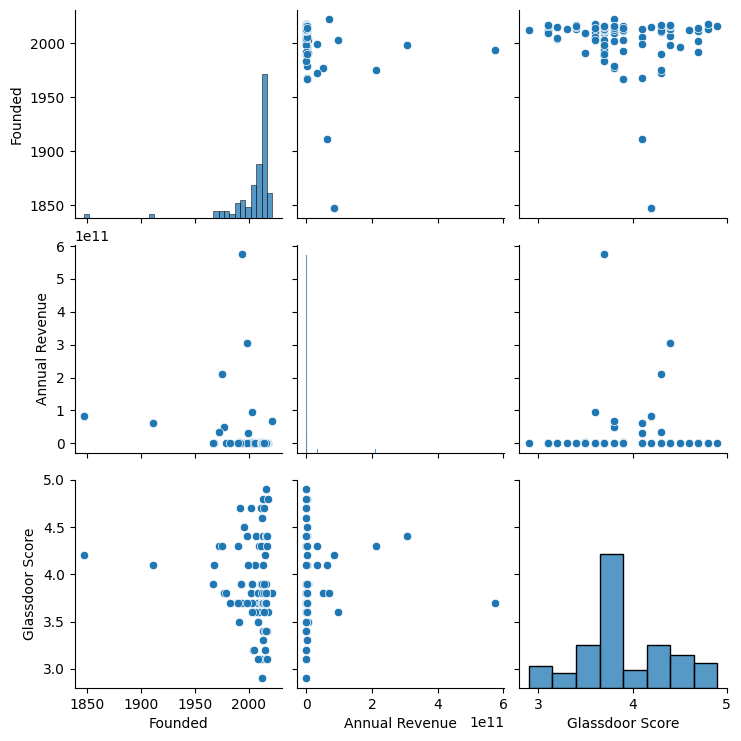

In [29]:
#Visualize relationships in dataset
sns.pairplot(AIcompanies_dataset, x_vars=["Founded", "Annual Revenue", "Glassdoor Score"], y_vars=["Founded", "Annual Revenue", "Glassdoor Score"])


In [34]:
#Train Model
#Step 1= Define Plotting Functions

def make_plots(df, feature_names, label_name, model_output, sample_size=50):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['REV_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['REV_PREDICTED'] = df['REV_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='REV_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")


SUCCESS: defining plotting functions complete.


In [35]:

# Define ML functions
def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = keras.Input(shape=(num_features,))
  outputs = keras.layers.Dense(units=1)(inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  # input_x = df.iloc[:,1:3].values
  # df[feature]
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, df, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")


SUCCESS: defining linear regression functions complete.


In [36]:
#Train a model with one feature
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['Founded']
label = 'Annual Revenue'

model_1 = run_experiment(AIcompanies_dataset, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['Founded'] and label=Annual Revenue

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6856561547685553766400.0000 - root_mean_squared_error: 81949646848.0000 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4395619352379824013312.0000 - root_mean_squared_error: 65249886208.0000 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6793489197854183391232.0000 - root_mean_squared_error: 81628659712.0000
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6878040903158343925760.0000 - root_mean_squared_error: 82058240000.0000
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4400837054023109443584.0000 - root_mean_squared_error: 65303441408.0000
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5817707777390700134400.0000 - root_mean_squared_error: 76183519232.0000
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4230358638153556819968.0000 - root_mean_squared_error: 63450996736.0000 
Epoch 8

In [39]:
#@title Code - Define functions to make predictions
def format_currency(x):
  return "${:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_REV(model, df, features, label, batch_size=20):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

  data = {"PREDICTED_REV": [], "OBSERVED_REV": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_REV"].append(format_currency(predicted))
    data["OBSERVED_REV"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [40]:
#@title Code - Make predictions

output = predict_REV(model_1, AIcompanies_dataset, features, label)
show_predictions(output)

IndexError: list index out of range

In [41]:
#@title Code - Define functions to make predictions
def format_currency(x):
  return "${:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_REV(model, df, features, label, batch_size=20):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

  # Changed this line to handle cases with 1 or 2 features
  data = {"PREDICTED_REV": [], "OBSERVED_REV": [], "L1_LOSS": [],
          features[0]: []}
  if len(features) > 1:
    data[features[1]] = []  # Add the second feature column if it exists

  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_REV"].append(format_currency(predicted))
    data["OBSERVED_REV"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    # Only access features[1] if it exists
    if len(features) > 1:
      data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [43]:
#@title Code - Make predictions

output = predict_REV(model_1, AIcompanies_dataset, features, label)
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_REV      OBSERVED_REV           L1_LOSS  Founded
0        $364.29    $1950000000.00    $1949999635.71     2009
1        $364.47     $189000000.00     $188999635.53     2010
2        $365.56      $40000000.00      $39999634.44     2016
3        $358.49   $49954000000.00   $49953999641.51     1977
4        $361.39     $612700000.00     $612699638.61     1993
5        $365.01     $663900000.00     $663899634.99     2013
6        $358.12  $211000000000.00  $210999999641.88     1975
7        $364.47     $596400000.00     $596399635.53     2010
8        $364.83     $730000000.00     $729999635.17     2012
9        $362.29      $22400000.00      $22399637.71     1998
10       $365.56       $7400000.00       $7399634.44     2016
11       $365